# Single Family Home Price Forecast - SARIMA

## Part 1 - EDA

### Single Home Values, Historical Asset Perfomance

This project aims to analyze the historical performance of single home values in several cities in the United States and create a model that can forecast the valuation of the same asset type in a specific city. 

Real estate is one of the oldest and most profitable types of investment assets in the market. The natural scarcity of real estate and the long-lasting need for families to own or rent a place to live make single-family homes desirable for affluent individuals and investment firms. 

Single-home values correlate with the nation’s economic growth, demographic trends in a specific area, and the demand and supply of single-family homes in a particular location. Several affluent individuals and investment firms have constantly tried diversifying their portfolios and investing in mature and rapidly growing real estate markets. Nevertheless, since the COVID-19 pandemic, the “typical trends” of housing demand growth have changed as more people can work remotely. Hence, the demand for office space in large metropolitan areas has decreased while the demand for housing in more affordable regions has increased. 

The data set used for this project is called "The ZHVI Single-Family Homes Times Series", which is published by Zillow. Zillow is a real estate marketplace that keeps track of historical single-home values. Zillow publishes current and historical housing data sets and it makes available to the public. The ZHVI Single-Family Homes Times Series has approximately 20+ years of monthly single-family home values and market changes across a region. It reflects the typical value for homes in the 35th to 65th percentile range. This data set also provides the state, county, zip code, and metropolitan area of the cities. 

The ZHVI Single-Family Homes Times Series will be cleaned, evaluated, and prepared to be analyzed using a SARIMA model. A SARIMA model, which stands for Seasonal Autoregressive Integrated Moving Average, is a statistical method that is normally used for time series forecasting, particularly when data exhibits seasonal patterns. This model is efficient at capturing both trend patterns and seasonality within the data. The data will be fit to this model and its accuracy will be evaluated.


### Graphical Analysis

In [6]:
# Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [7]:
# Import data frame
zillowdf = pd.read_csv('HistoricalSingleHomeValues_Zillow2000to24.csv')

In [8]:
# Drop unnecessary columns
zillowdf = zillowdf.drop(['RegionType','StateName'], axis=1)

In [9]:
# Round all values
zillowdf.iloc[:,6:] = zillowdf.iloc[:,6:].round()

In [10]:
# Melt data frames to convert column dates as rows
melted_df = zillowdf.melt(id_vars=['RegionID', 'SizeRank', 'RegionName',
                                   'State', 'Metro', 'CountyName'],
                          var_name='Date', value_name='HomeValue')

# Convert 'Date' Column into date format
melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%Y-%m-%d')

#### Graph 1 - Single Home Value Trends in the United States

In [12]:
# Group by home value
us_df = melted_df.groupby(['Date'])['HomeValue'].mean().round().reset_index()

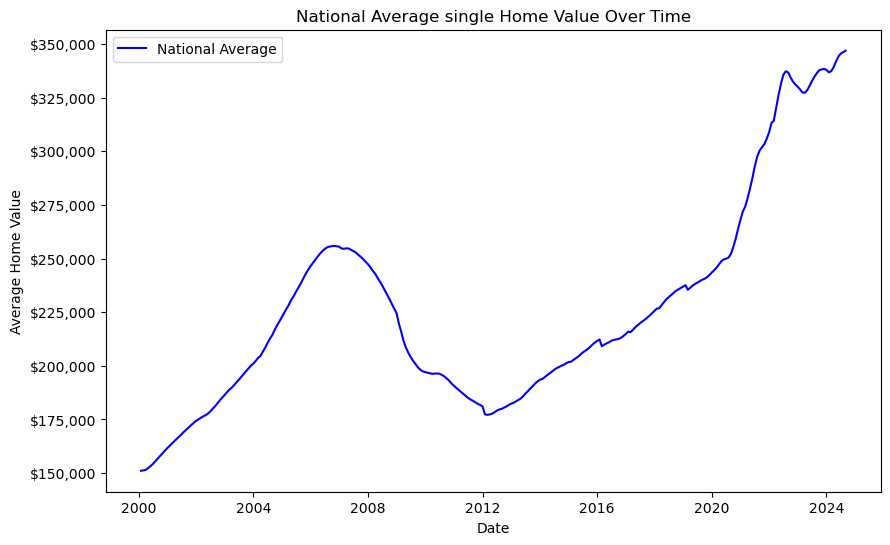

In [13]:
# Plot the table
plt.figure(figsize=(10,6))
plt.plot(us_df['Date'], us_df['HomeValue'], label='National Average', color='blue')

# Add Labels
plt.xlabel('Date')
plt.ylabel('Average Home Value')
plt.title('National Average single Home Value Over Time')
plt.legend()

# Format y axis to show values of homes
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Display the plot
plt.show()

This graph illustrates the average single family home value in the United States from 2020 to Aug 2024. This table shows that the value of this asset class has increased by almost 40% since 2020. The rapid increase in pricing has not been seen in the in the last 24 years. This value trend proves investors that single family homes values have constantly increased in the last decade. Nevertheless, this table also shows that this asset class can be highly affected by economic recessions as it can be ovserved afer the 2008 financial crisis. 

#### Graph 2 - Most Expensive Single Home Values by US State

In [16]:
# Group by home value
state_price_df = melted_df.groupby(['State','Date'])['HomeValue'].mean().round().reset_index()

# Get the latest date
latest_date = state_price_df['Date'].max()

# Filter data frame using latest date
latest_state_prices = state_price_df[state_price_df['Date'] == latest_date]

# Sort by HomeValue
latest_state_prices = latest_state_prices.sort_values(by='HomeValue', ascending=False)

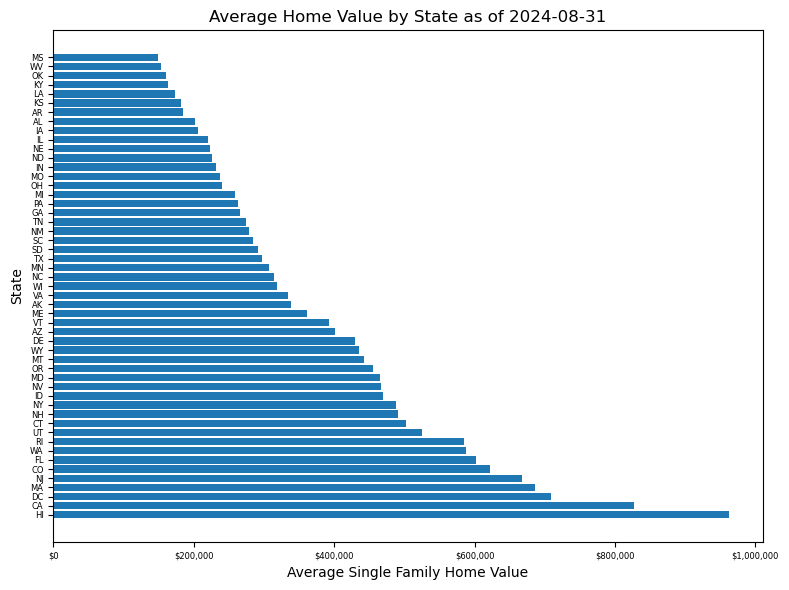

In [17]:
# Plot bar chart with average home value per state
plt.figure(figsize=(8,6))
plt.barh(latest_state_prices['State'],latest_state_prices['HomeValue'])

# Add Title and Labels
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel('Average Single Family Home Value')
plt.ylabel('State')
plt.title(f'Average Home Value by State as of {latest_date.date()}')

# Format x axis to show values of homes
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Show table
plt.tight_layout()
plt.show()

The table above shows the average price of single family home values in by state. This table is helpful to illustrate which US states single family home markets might the most attractive, the most developed, and/or which markets might have the higher chances for growth.

#### Graph 3 - Single Home Value Trends by Metro Area

In [20]:
# Group by Metropolitan area and Date
metro_df = melted_df.groupby(['Metro','Date'])['HomeValue'].mean().round().reset_index()

# Pivot dataframe
metro_df = metro_df.pivot(index='Date', columns='Metro', values='HomeValue')

In [21]:
# Figure out what the top 5 metros are as of 2024-08-31
top5_metros = metro_df.loc['2024-08-31'].nlargest(5).index

# filter DF using top 5 metros
top5_metros_df = metro_df[top5_metros]

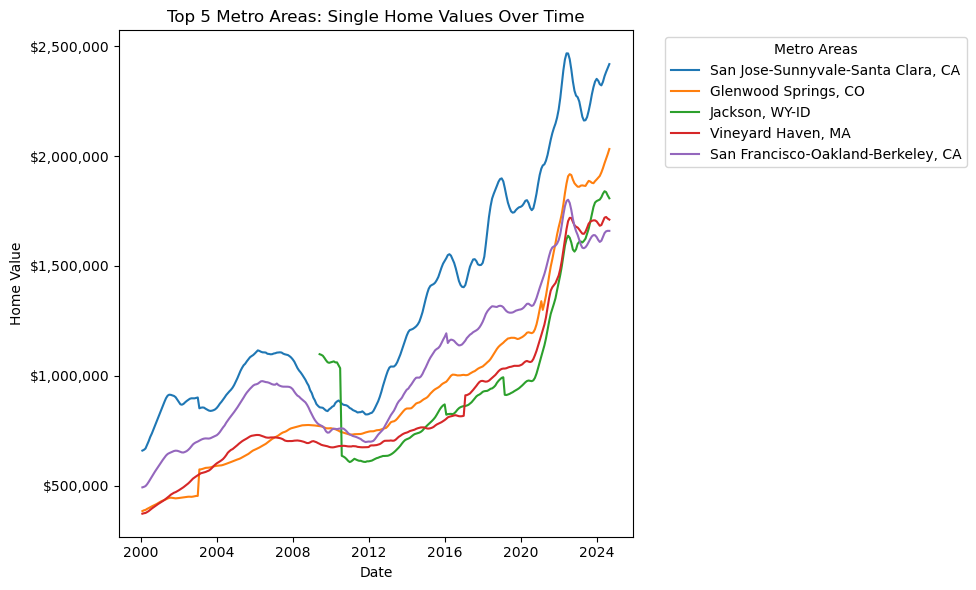

In [22]:
# Plot line chart for each metro zone
plt.figure(figsize=(10,6))

# Plot line per metro
for metro in top5_metros_df.columns:
    plt.plot(top5_metros_df.index, top5_metros_df[metro], label=metro)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Home Value')
plt.title('Top 5 Metro Areas: Single Home Values Over Time')
plt.legend(title='Metro Areas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y axis to show values of homes
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Display the plot
plt.tight_layout()
plt.show()

The table above show the average single family home values on the top 5 metropolitan areas in the United States. This table shows some metropolitan areas, like San Jose - San Francisco, that have been some of the most expensive places to live in the nation for the last couple of decades, but it also shows some areas that are not as popular/widely recognized, like Jackson Wyoming, are growing. This proves that new metro areas are becoming highly demanded, proving that investors need to be aware of market conditions to take advantage of developing markets. Investment in developing markets might be less capital constraining and more profitable than trying to invest in markets that are highly competitve and somewhat mature like San Francisco, New York, or San Jose among others.

#### Graph 4 - Value Trends by US City

In [25]:
# Group by City and Date
city_df = melted_df.groupby(['RegionName','Date'])['HomeValue'].mean().round().reset_index()

# Pivot dataframe
city_df = city_df.pivot(index='Date', columns='RegionName', values='HomeValue')

In [26]:
# Figure out what the top 10 cities are as of 2024-08-31
top10_cities = city_df.loc['2024-08-31'].nlargest(10).index

# filter df using top 10 citites
top10_cities_df = city_df[top10_cities]

In [27]:
# Get the state of the top 10 cities
state_dict = {}
for city in top10_cities_df.columns:
    state = melted_df.loc[melted_df['RegionName'] == city, 'State'].unique()
    state_dict[city] = state

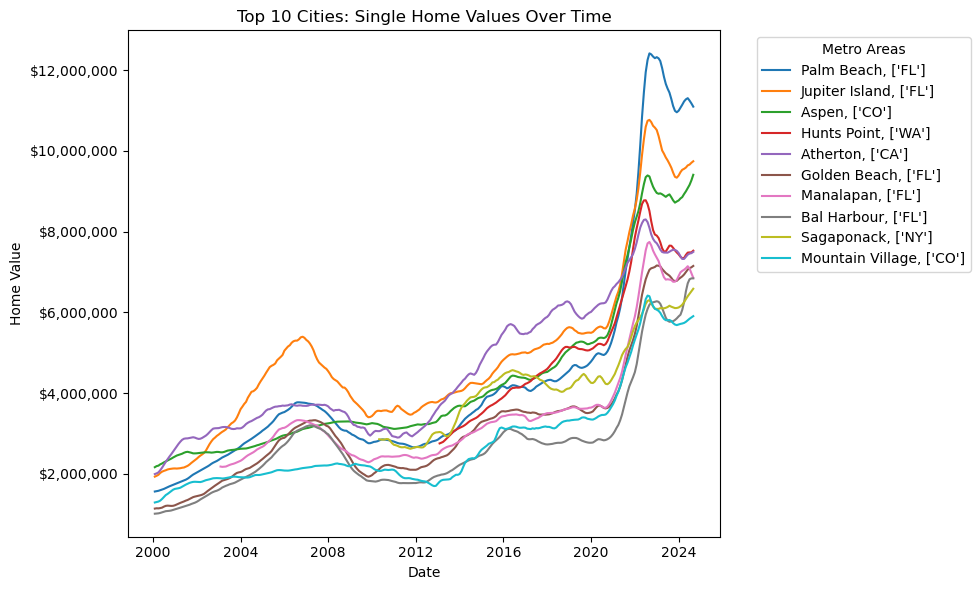

In [28]:
# Plot line chart for city
plt.figure(figsize=(10,6))

# Plot line per city
for city in top10_cities_df.columns:
    state = state_dict[city]
    plt.plot(top10_cities_df.index, top10_cities_df[city], label=f"{city}, {state}")

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Home Value')
plt.title('Top 10 Cities: Single Home Values Over Time')
plt.legend(title='Metro Areas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y axis to show values of homes
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Display the plot
plt.tight_layout()
plt.show()

This table shows the average home values different cities in the United Stats. Interestingly, most of the cities shown in this table do not match the top metro areas. This shows that some of the cities above might be showing highly priced houses rather than a single family home where investors might be more interested on placing capital.

## Part 2 - Data Preparation

In [31]:
# Import Libaries
import pandas as pd
import numpy as np

In [32]:
# Import data frame
zillowdf = pd.read_csv('HistoricalSingleHomeValues_Zillow2000to24.csv')

In [33]:
# Drop unnecessary columns
zillowdf = zillowdf.drop(['SizeRank','RegionID','State',
                          'RegionType','StateName',
                         'Metro','CountyName'], axis=1)

In [34]:
# Round all values
zillowdf.iloc[:,1:] = zillowdf.iloc[:,1:].round()

In [35]:
# Melt data frames to convert city names as rows
melted_df = zillowdf.melt(id_vars=['RegionName'], var_name='Date',
                          value_name='HomeValue')

# Convert 'Date' Column into date format
melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%Y-%m-%d')

In [36]:
# Transform column 'Date' to index
melted_df.set_index('Date', inplace=True)

In [37]:
# Display melted data frame
melted_df

,RegionName,HomeValue
Date,,
2000-01-31,New York,243953.0
2000-01-31,Los Angeles,228465.0
2000-01-31,Houston,103177.0
2000-01-31,Chicago,129925.0
2000-01-31,San Antonio,98470.0
...,...,...
2024-08-31,Stirling City,158807.0
2024-08-31,Jumpertown,126549.0
2024-08-31,Dollar Bay,137835.0


## Part 3 - Model Building and Evaluation

### Model Creation and Evaluation

In [40]:
# Import Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [41]:
# Filter for a specific city
city_df = melted_df[melted_df['RegionName'] == 'Los Angeles']

In [42]:
# Find total lenght
train_size = int(len(city_df) * 0.8)

# Divide data into train and test sets
train, test = city_df['HomeValue'][:train_size], city_df['HomeValue'][train_size:]

In [43]:
# Setup the SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False, enforce_invertibility=False)

C:\Users\emili\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\emili\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [44]:
# Create fit for SARIMA Model
sarima_fit = sarima_model.fit(disp=False)

In [45]:
# Fit the SARIMA Model
forecast = sarima_fit.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean

In [46]:
# Evaluate the model's accuracy
mae = mean_absolute_error(test, forecast_values)
mse = mean_squared_error(test, forecast_values)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 161095.19538567812
Mean Squared Error: 33707947269.907036


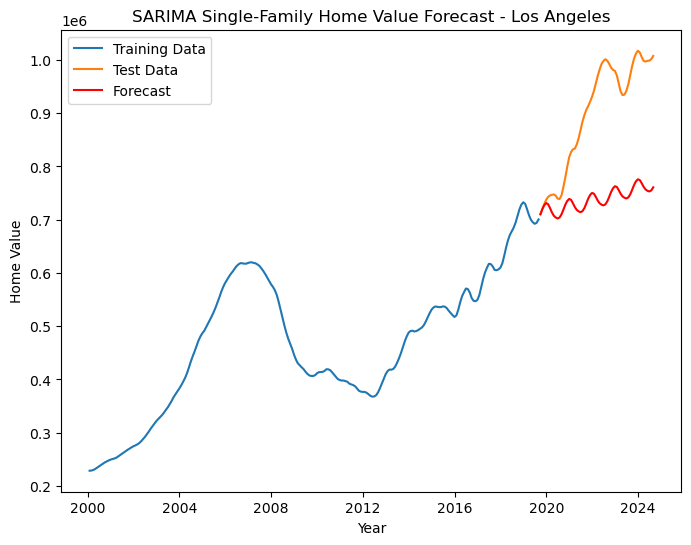

In [47]:
# Plot the SARIMA forecast vs. Actual Values
plt.figure(figsize=(8,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast', color='red')

# Add labels
plt.xlabel('Year')
plt.ylabel('Home Value')
plt.title("SARIMA Single-Family Home Value Forecast - Los Angeles")
plt.legend()

# Show the graph
plt.show()

### Conclusion

SARIMA was considered the appropriate model to predict home values, specially when compared to other model types like linear regression or KNN. Neither linear regression nor KNN have built-in methods to account for data seasonality and/or time series. In addition, SARIMA has the option to adjust for non-stationary time series values as the one used in this analysis.
This model has several disadvantages as it only uses the historical data of one specific city to forecast home values. The home value predictions for New York are somewhat accurate but the model did not perform well when predicting home values in other large cities like Los Angeles or Fresno.